In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Udacity DSND Project 1: Exploring Airbnb Seattle Dataset

### Business Questions:
   1. What?
   2. What?
   3. What?

### 1. Exploring the listing dataset

In [2]:
seattle_listings_df = pd.read_csv("data/airbnb/seattle/listings.csv")
seattle_listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Show all the columns of the dataset

In [3]:
seattle_listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [4]:
seattle_listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

#### Compute the null value proportion of each column

In [5]:
seattle_listings_df.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

### 2. Clean the dataset
Delete columns with more than 30% missing values.

In [6]:
seattle_listings_df = seattle_listings_df.dropna(thresh=seattle_listings_df.shape[0] * 0.7, axis=1)

Change data type of price and cleaning_fee columns into float64. 

In [9]:
convertMoney2float64(seattle_listings_df, 'price')
convertMoney2float64(seattle_listings_df, 'cleaning_fee')

In [8]:
import re

def convertMoney2float64(df, col):
    # remove $ and , from the string
    currency_symbol = re.compile('[$,]')
    df[col] = df[col].apply(lambda x: currency_symbol.sub('', x) if pd.notna(x) else x)
    # convert data type to float64
    df[col] = df[col].astype('float64')

Imputing missing values of numerical columns with column mean value.

In [10]:
fill_mean = lambda col: col.fillna(col.mean())

seattle_listings_df[list(seattle_listings_df.dtypes[seattle_listings_df.dtypes != 'object'].index)].apply(fill_mean)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,207,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,2,4.070000
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,43,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,6,1.480000
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,20,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2,1.150000
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,0,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,1,2.078919
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,38,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0.890000
5,5956968,20160104002432,326758,1.0,1.0,47.630525,-122.366174,2,1.0,1.0,...,17,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.450000
6,1909058,20160104002432,2497928,1.0,1.0,47.636605,-122.368519,2,1.0,1.0,...,58,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,2.460000
7,856550,20160104002432,4016632,5.0,5.0,47.640161,-122.375856,2,1.0,1.0,...,173,97.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,5,4.730000
8,4948745,20160104002432,2166277,1.0,1.0,47.632410,-122.357216,2,1.0,1.0,...,8,97.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000,1,1.220000
9,2493658,20160104002432,5177328,6.0,6.0,47.637492,-122.366889,4,1.0,1.0,...,32,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,6,1.550000


Create dummy columns for categorical columns

In [13]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [14]:
seattle_listings_df_cat = seattle_listings_df.select_dtypes(include='object')

In [16]:
seattle_listings_df_cat.columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'requires_license', 'jurisdiction_names',
       'inst

In [43]:
seattle_listings_df_cat['host_verifications'].values[0]

"['email', 'phone', 'reviews', 'kba']"

In [79]:
seattle_listings_df.isnull()['neighbourhood'].mean()

0.10895756940806706

In [80]:
seattle_listings_df = seattle_listings_df.dropna(subset=['neighbourhood'], axis=0)

In [88]:
neighbourhood_list_count = seattle_listings_df.groupby(['neighbourhood']).size()
data = neighbourhood_list_count.sort_values(ascending=False)[:10]
data

neighbourhood
Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Stevens                 98
dtype: int64

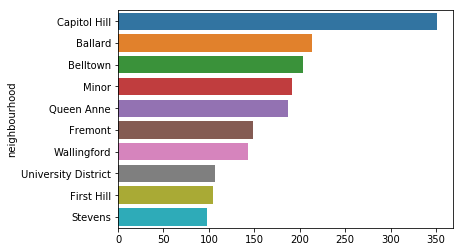

In [89]:
ax = sns.barplot(y=data.index, x=data.values)

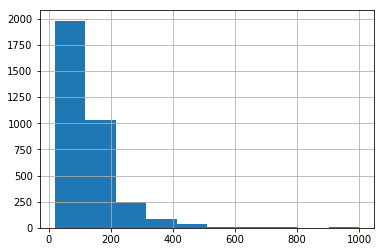

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

seattle_listings_df['price'].hist()

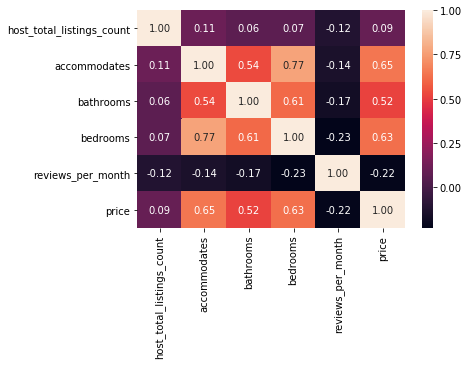

In [15]:
sns.heatmap(seattle_listings_df[['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'reviews_per_month', 'price']].corr(), annot=True, fmt='.2f')

In [19]:
seattle_listings_df.groupby(['cancellation_policy']).mean()['price']

cancellation_policy
flexible    108.925358
moderate    115.290409
strict      156.761171
Name: price, dtype: float64